## This notebook benchmarks the functions used to calculate fo2, Fe3FeT from these etc.

In [1]:
# Loading various python things
import numpy as np
import pandas as pd
import sys
sys.path.append("../..") # This finds the PT_Thermobar_V1 2 folders above. Remove if place in same folder
import matplotlib.pyplot as plt
import Thermobar as pt

In [2]:
myLiquids1_noH=pd.DataFrame(data={
    "Sample_ID_Liq": 0,
    "SiO2_Liq": 51,
                            "TiO2_Liq": 0.86,
                            "Al2O3_Liq": 16.3,
                            "FeOt_Liq": 11.3,
                            "MnO_Liq": 0.16,
                            "MgO_Liq": 8.3,
                            "CaO_Liq": 9.95,
                            "Na2O_Liq": 1.8,
                            "K2O_Liq": 0.34,
                            "Cr2O3_Liq": 0,
                            "P2O5_Liq": 0,
                            "H2O_Liq": 0,
                          "Fe3Fet_Liq":0,
}, index=[0])



In [3]:
np.sum(myLiquids1_noH, axis=1)

0    100.01
dtype: float64

## Comparison 1 - using a known log fo2 vs. MELTS

In [6]:
logfo2=-7.58429552677443

myLiquids_Fe3_Kress_norm=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_noH, T_K=1190+273.15, 
                                          P_kbar=3, fo2=10**logfo2, model="Kress1991", re_norm=True)

myLiquids_Fe3_Kress_no_norm=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_noH, T_K=1190+273.15, 
                                          P_kbar=3, fo2=10**logfo2, model="Kress1991", re_norm=False)

myLiquids_Fe3_Put_normm=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_noH, T_K=1190+273.15, 
                                          P_kbar=3, fo2=10**logfo2, model="Put2016_eq6b")

- MELTS for excel gives Fe3Fet=0.170535, e.g. Match to 3rd sf, likely results from changes to how renormalizatoin is done?

In [12]:
myLiquids_Fe3_Kress_no_norm['Fe3Fet_Liq']

0    0.170454
Name: Fe3Fet_Liq, dtype: float64

## Checking match is good when H2O present as well, as uses hydrous fractions

In [13]:
myLiquids1_H=pd.DataFrame(data={
    "Sample_ID_Liq": 0,
    "SiO2_Liq": 51,
                            "TiO2_Liq": 0.86,
                            "Al2O3_Liq": 16.3,
                            "FeOt_Liq": 11.3,
                            "MnO_Liq": 0.16,
                            "MgO_Liq": 8.3,
                            "CaO_Liq": 9.95,
                            "Na2O_Liq": 1.8,
                            "K2O_Liq": 0.34,
                            "Cr2O3_Liq": 0,
                            "P2O5_Liq": 0,
                            "H2O_Liq": 10,
                          "Fe3Fet_Liq":0,
}, index=[0])

logfo2=-7.58429552677443

In [22]:
myLiquids_Fe3_Kress_norm_H=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_H, T_K=1190+273.15, 
                                          P_kbar=3, fo2=10**logfo2, model="Kress1991", re_norm=True)

myLiquids_Fe3_Kress_no_norm_H=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_H, T_K=1190+273.15, 
                                          P_kbar=3, fo2=10**logfo2, model="Kress1991", re_norm=False)

In [23]:
myLiquids_Fe3_Kress_norm_H

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq
0,55.981581,0.944008,17.892242,2.313657,10.320837,0.175629,9.110773,10.921951,1.97583,0.373212,0.0,0.167853


In [25]:
myLiquids_Fe3_Kress_no_norm_H

,Sample_ID_Liq,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,FeO_Liq,Fe2O3_Liq,XFe3Fe2
0,0,51,0.86,16.3,11.3,0.16,8.3,9.95,1.8,0.34,0,0,10,0.167853,9.381726,2.103133,0.100912


In [19]:
myLiquids_Fe3_Kress_no_norm_H['Fe3Fet_Liq']

0    0.167853
Name: Fe3Fet_Liq, dtype: float64

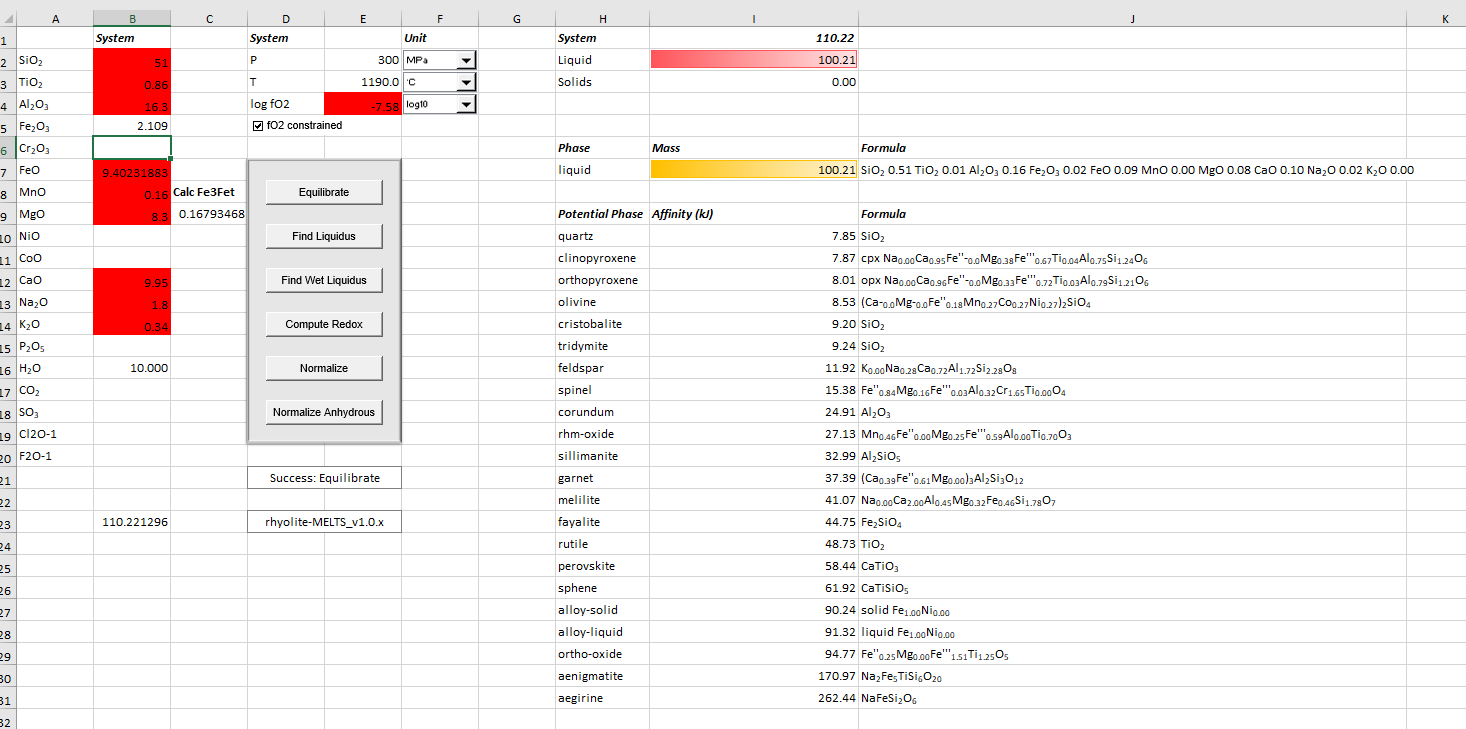

## Match to QFM is not good
This is because MELTS for excel is using a different buffer (Myers and Eugster, 1983 with a correction for pressure from frost), whereas we use frost (also used by thermoengine)

In [20]:
myLiquids_Fe3_Kress_norm_H=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_H, T_K=1190+273.15, 
                                          P_kbar=3, fo2="QFM", model="Kress1991", re_norm=True)

-8.191774425041862


- Value above is the fo2 calculated by Kaylas code, MELTSs for excel suggests logfo2=-8.18952021323856 for QFM,

Text(0, 0.5, 'log fo2')

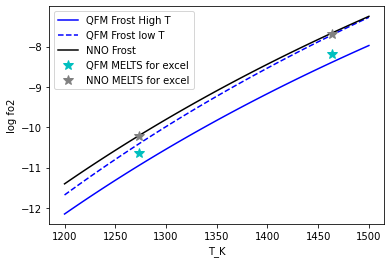

In [19]:
T_lin=np.linspace(1200, 1500)
P_kbar=3
logfo2_QFM=(-25096.3/T_lin) + 8.735 + 0.11 * ((1000*P_kbar/10)-1)/T_lin
logfo2_QFM_lowT=(-26455.3/T_lin) + 10.344 + 0.092 * ((1000*P_kbar/10)-1)/T_lin
logfo2_NNO=(-24930/T_lin) + 9.36 + 0.046 * ((1000*P_kbar/10)-1)/T_lin
#logfo2_ReReO=(-451020 + 297.595 * T_lin - 14.6585 * T_lin * np.log(T_lin))/(8.31441 * T_lin * np.log(10))
plt.plot(T_lin, logfo2_QFM, '-b', label='QFM Frost High T')
plt.plot(T_lin, logfo2_QFM_lowT, '--b', label='QFM Frost low T')
plt.plot(T_lin, logfo2_NNO, '-k', label='NNO Frost')
#plt.plot(T_lin, logfo2_ReReO, '-c')
# Values pasted in form MELTS for excel
plt.plot(1190+273.15, -8.18952021323856, '*c', ms=10, label='QFM MELTS for excel')
plt.plot(1190+273.15, -7.67858114342344, '*', ms=10, color='grey', label='NNO MELTS for excel')
plt.plot(1000+273.15, -10.6488603071123, '*c', ms=10)
plt.plot(1000+273.15, -10.2213533362133,  '*', color='grey', ms=10)

plt.legend()
plt.xlabel('T_K')
plt.ylabel('log fo2')

In [16]:
myLiquids_Fe3_Kress_norm_H

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq
0,56.005994,0.94442,17.900044,1.833464,10.758564,0.175706,9.114747,10.926714,1.976692,0.373375,0.0,0.132955


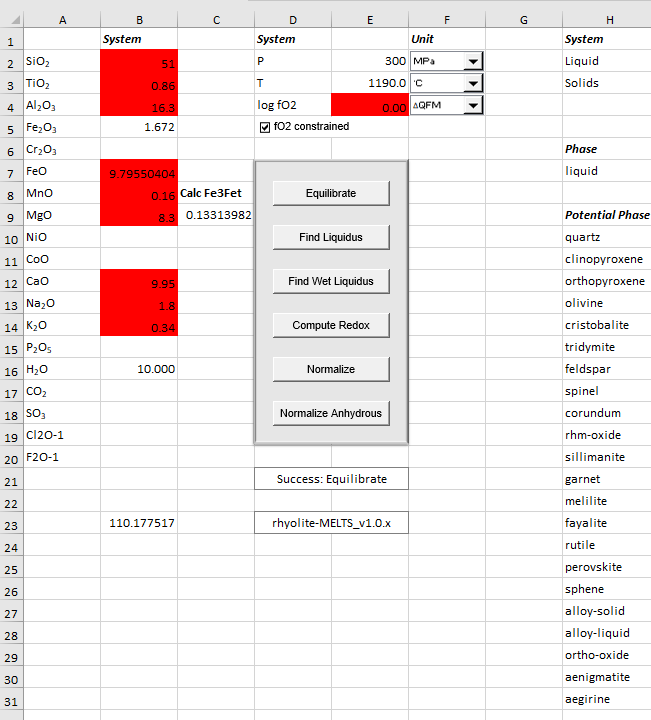

In [17]:
myLiquids_Fe3_Kress_norm_H=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_H, T_K=1190+273.15, 
                                          P_kbar=3, fo2="QFM", fo2_offset=1, model="Kress1991", re_norm=False)
myLiquids_Fe3_Kress_norm_H

-7.191774425041862


,Sample_ID_Liq,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,FeO_Liq,Fe2O3_Liq,XFe3Fe2
0,0,51,0.86,16.3,11.3,0.16,8.3,9.95,1.8,0.34,0,0,10,0.194071,9.083036,2.4308,0.120469


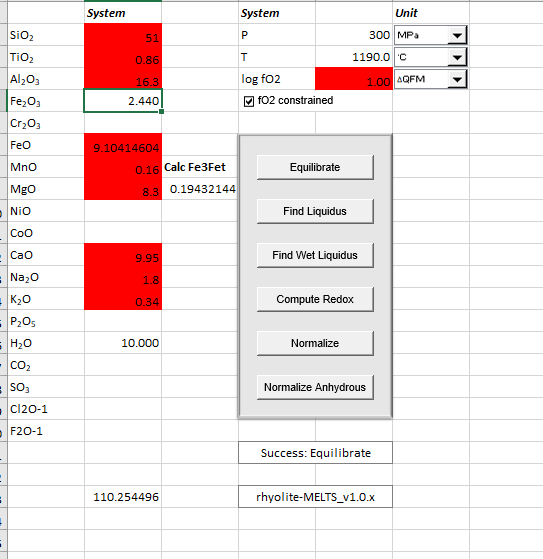

## fo2 value of NNO according to MELTS for excel is logf02=-7.67858114342344
- Close match to the 5th decimal place for logfo2, similar Fe3Fet value

In [22]:
myLiquids_Fe3_Kress_norm_H=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_H, T_K=1190+273.15, 
                                          P_kbar=3, fo2="NNO", fo2_offset=0, model="Kress1991", re_norm=False)
myLiquids_Fe3_Kress_norm_H

-7.678603150736425


,Sample_ID_Liq,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,FeO_Liq,Fe2O3_Liq,XFe3Fe2
0,0,51,0.86,16.3,11.3,0.16,8.3,9.95,1.8,0.34,0,0,10,0.161992,9.448529,2.02985,0.096707


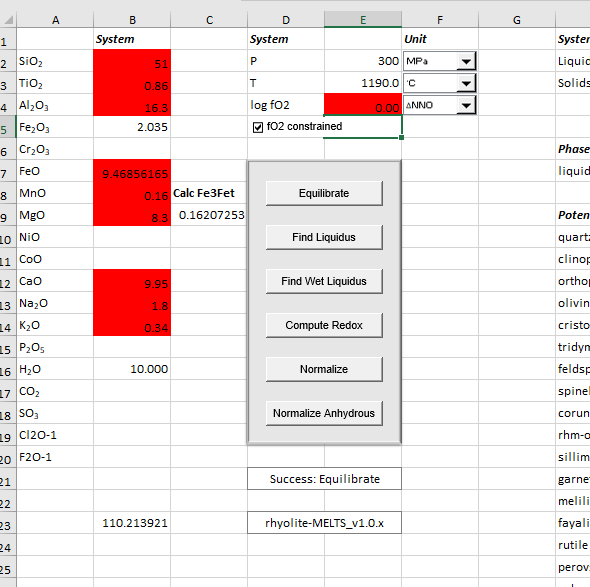

In [25]:
myLiquids_Fe3_Kress_norm_H=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_H, T_K=1190+273.15, 
                                          P_kbar=3, fo2="NNO", fo2_offset=0, model="Kress1991", re_norm=False)
myLiquids_Fe3_Kress_norm_H

-7.678603150736425


,Sample_ID_Liq,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,FeO_Liq,Fe2O3_Liq,XFe3Fe2
0,0,51,0.86,16.3,11.3,0.16,8.3,9.95,1.8,0.34,0,0,10,0.161992,9.448529,2.02985,0.096707


In [26]:
myLiquids_Fe3_Kress_norm_H=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_H, T_K=1190+273.15, 
                                          P_kbar=3, fo2="NNO", fo2_offset=5, model="Kress1991", re_norm=False)
myLiquids_Fe3_Kress_norm_H

-2.678603150736425


,Sample_ID_Liq,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,FeO_Liq,Fe2O3_Liq,XFe3Fe2
0,0,51,0.86,16.3,11.3,0.16,8.3,9.95,1.8,0.34,0,0,10,0.648637,3.936616,8.076493,0.923544


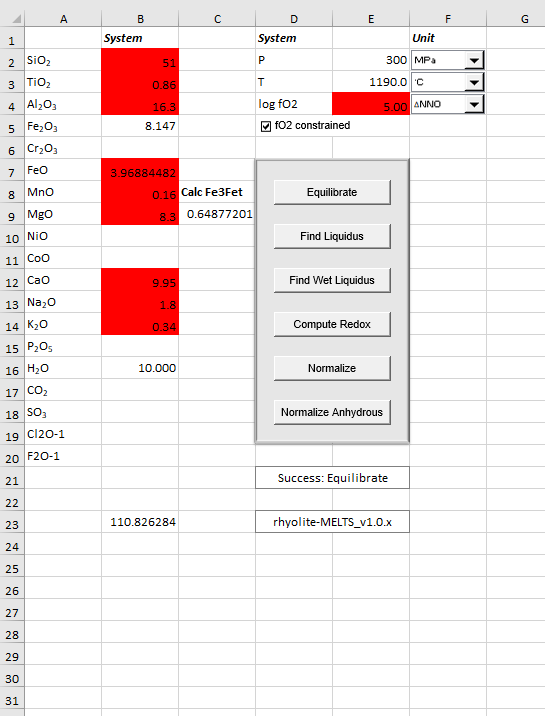